In [1]:
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

In [2]:
adj =  np.genfromtxt('Inputs/adj.csv', delimiter=',')

In [3]:
data = np.genfromtxt('Inputs/data.csv', delimiter=',')

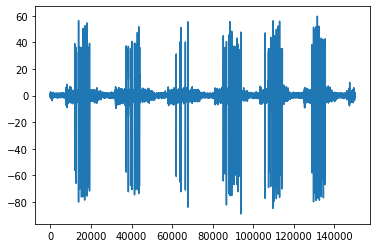

<Figure size 1200x1200 with 0 Axes>

In [4]:
plt.plot(data[:,1])
plt.figure(figsize=(12,12), dpi=100)
plt.show()

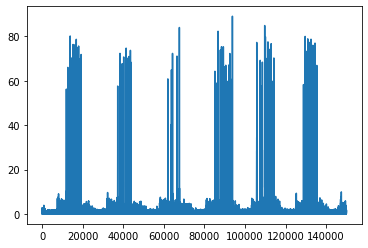

In [5]:
bruh = np.absolute(data)
plt.plot(bruh[:,1])
plt.show()

In [6]:
strong = 4*np.median(bruh)/0.6745 
strong

3.567790807638962

In [7]:
ix = np.diff(np.sign(bruh-strong), axis=0) > 0

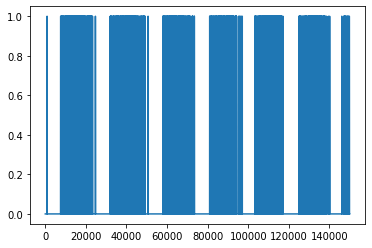

In [8]:
plt.plot(ix[:,1])
plt.show()

In [9]:
ix.shape

(149999, 16)

In [10]:
index = (lambda i: np.where(ix[:,i] == True))([])
index

(array([], dtype=int64), array([], dtype=int64))

In [11]:
index = []
for i in range(ix.shape[1]):
    index.append(np.where(ix[:,i] == True))

for i in range(len(index)):
    index[i] = index[i][0] 
    
    

In [12]:
data[index[3][41]+1,3]

4.09946120867801

In [13]:
data.shape

(150000, 16)

In [14]:
spk_weights = [(1,2),(2,3),(3,4),(4,5),(5,6)]
x = np.asarray([x[0] for x in spk_weights])
y = np.asarray([y[1] for y in spk_weights])
np.sum(np.power(x*y, 1))


70

In [15]:
res_bin = np.zeros(data.shape)
res_bin[1][2]

0.0

/home/samir/repos/floodfill/rewrite/env/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


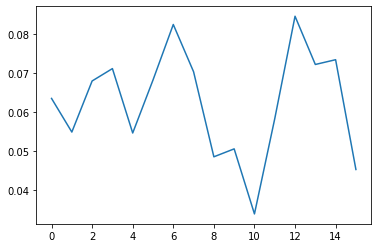

In [16]:
index = np.diff(np.sign(data-strong), axis=0) > 0
ix = []
# BC: Replace for loops with list-comprehension / lambda 
for i in range(index.shape[1]):
    ix.append(np.where(index[:,i] == True))

for i in range(len(ix)):
    ix[i] = ix[i][0]
bruh = np.asarray([np.where(i == True)[0] for i in index.transpose()])
chanSpikes = [x.shape[0] for x in bruh]
chanSpikes = [x/sum(chanSpikes) for x in chanSpikes]
plt.plot(chanSpikes)

In [156]:
#for i in range(1,16,2):
    #print("{} -> {}".format(i-1, i))
    #print("{} -> {}".format(i, i-1))

dumadj = []
for i in range(1,16,2):
    dumadj.append([i-1, i])
    dumadj.append([i, i-1])
dumadj= np.asarray(dumadj)
dumadj

array([[ 0,  1],
       [ 1,  0],
       [ 2,  3],
       [ 3,  2],
       [ 4,  5],
       [ 5,  4],
       [ 6,  7],
       [ 7,  6],
       [ 8,  9],
       [ 9,  8],
       [10, 11],
       [11, 10],
       [12, 13],
       [13, 12],
       [14, 15],
       [15, 14]])

In [157]:
def gen_dummy_data():
    # TODO: Paramterize this so it can change size, perhaps function o_O
    return np.asarray([np.sin(np.arange(0,100,.1))]*16).transpose()
    
def gen_dummy_adj():
    # TODO: No clue, this is hard coded
    tmp = []
    for i in range(1,16,2):
        tmp.append([i-1, i])
        tmp.append([i, i-1])
    return np.asarray(tmp)


In [181]:
dum = gen_dummy_data()
duma = gen_dummy_adj()
min((-1*dum[0,0] - .25)/(.75-.25),1), min((-1*dum[50,0] - .25)/(.75-.25),1)
(-1*dum[40,0] - .25)/(.75-.25)

1.0136049906158564